# Bombunia charts
Python 3.8


In [6]:
!python -m pip install matplotlib ujson seaborn

     ---------------------------------------- 7.7/7.7 MB 4.1 MB/s eta 0:00:00
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
     ---------------------------------------- 2.5/2.5 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 KB 9.5 MB/s eta 0:00:00
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 55.4/55.4 KB 2.8 MB/s eta 0:00:00


You should consider upgrading via the 'c:\Users\suchencjusz\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [33]:
import ujson
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import datetime
import time
import re

# unix time to datetime
def unix_to_datetime(unix_time):
    return datetime.datetime.fromtimestamp(unix_time).strftime('%Y-%m-%d %H:%M:%S')

In [37]:
grades = []
grades_list = os.listdir('grades')

grades_list.sort(key=lambda f: int(re.sub('\D', '', f)))

for file in grades_list:
    with open('grades/' + file, 'r') as f:
        grades.append(ujson.load(f))

print('Loaded {} grades'.format(len(grades)))
print('First grade: {}'.format(unix_to_datetime(grades[0][0]['time'])))
print('Last grade: {}'.format(unix_to_datetime(grades[-1][0]['time'])))

Loaded 86 grades
First grade: 2022-09-01 15:11:30
Last grade: 2023-02-27 16:02:18


In [ ]:
class Subject:
    def __init__(self, subject_name, a, b, c, d, e, f, time):
        self.subject_name = subject_name
        self.a = a  # 1
        self.b = b  # 2
        self.c = c  # 3
        self.d = d  # 4
        self.e = e  # 5
        self.f = f  # 6
        self.grades = grades
        self.time = time

    def __str__(self):
        return (
            self.subject_name
            + " "
            + str(self.a)
            + " "
            + str(self.b)
            + " "
            + str(self.c)
            + " "
            + str(self.d)
            + " "
            + str(self.e)
            + " "
            + str(self.f)
        )


days = []

for day in grades:

    _day_subjects = []
    for s in day[0]['allGrades']:

        _time = unix_to_datetime(day[0]["time"])
        _subject = Subject(
            s["subject_name"],
            s["grades"][0],
            s["grades"][1],
            s["grades"][2],
            s["grades"][3],
            s["grades"][4],
            s["grades"][5],
            _time,
        )

        _day_subjects.append(_subject)

    days.append(_day_subjects)

for day in days:

    print('Day: {}'.format(day[0].time))
    for subject in day:
        print(subject)

    print('-' * 50)
        

# ILOSC PAL WZGLEDEM CZASU

In [ ]:
# create graph of a grade for a subject

y_axis = [] # much palas
x_axis = [] # time

for day in days:
    _much_palas = 0
    _day_time = day[0].time
    for subject in day:
        _much_palas += subject.a

    y_axis.append(_much_palas)
    x_axis.append(_day_time)

plt.figure(figsize=(20, 10))
plt.plot(x_axis, y_axis)
plt.xticks(rotation=90)
plt.show()

## Ile pał


In [ ]:
y_axis = [] # much palas
x_axis = [] # time

for day in days:
    _much_palas = 0
    _day_time = day[0].time
    for subject in day:
        _much_palas += subject.a

    y_axis.append(_much_palas)
    x_axis.append(_day_time)

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(x=x_axis, y=y_axis, linewidth=1.5, color='#d44040')
plt.xticks(rotation=90)
plt.show()

# Ile ocen


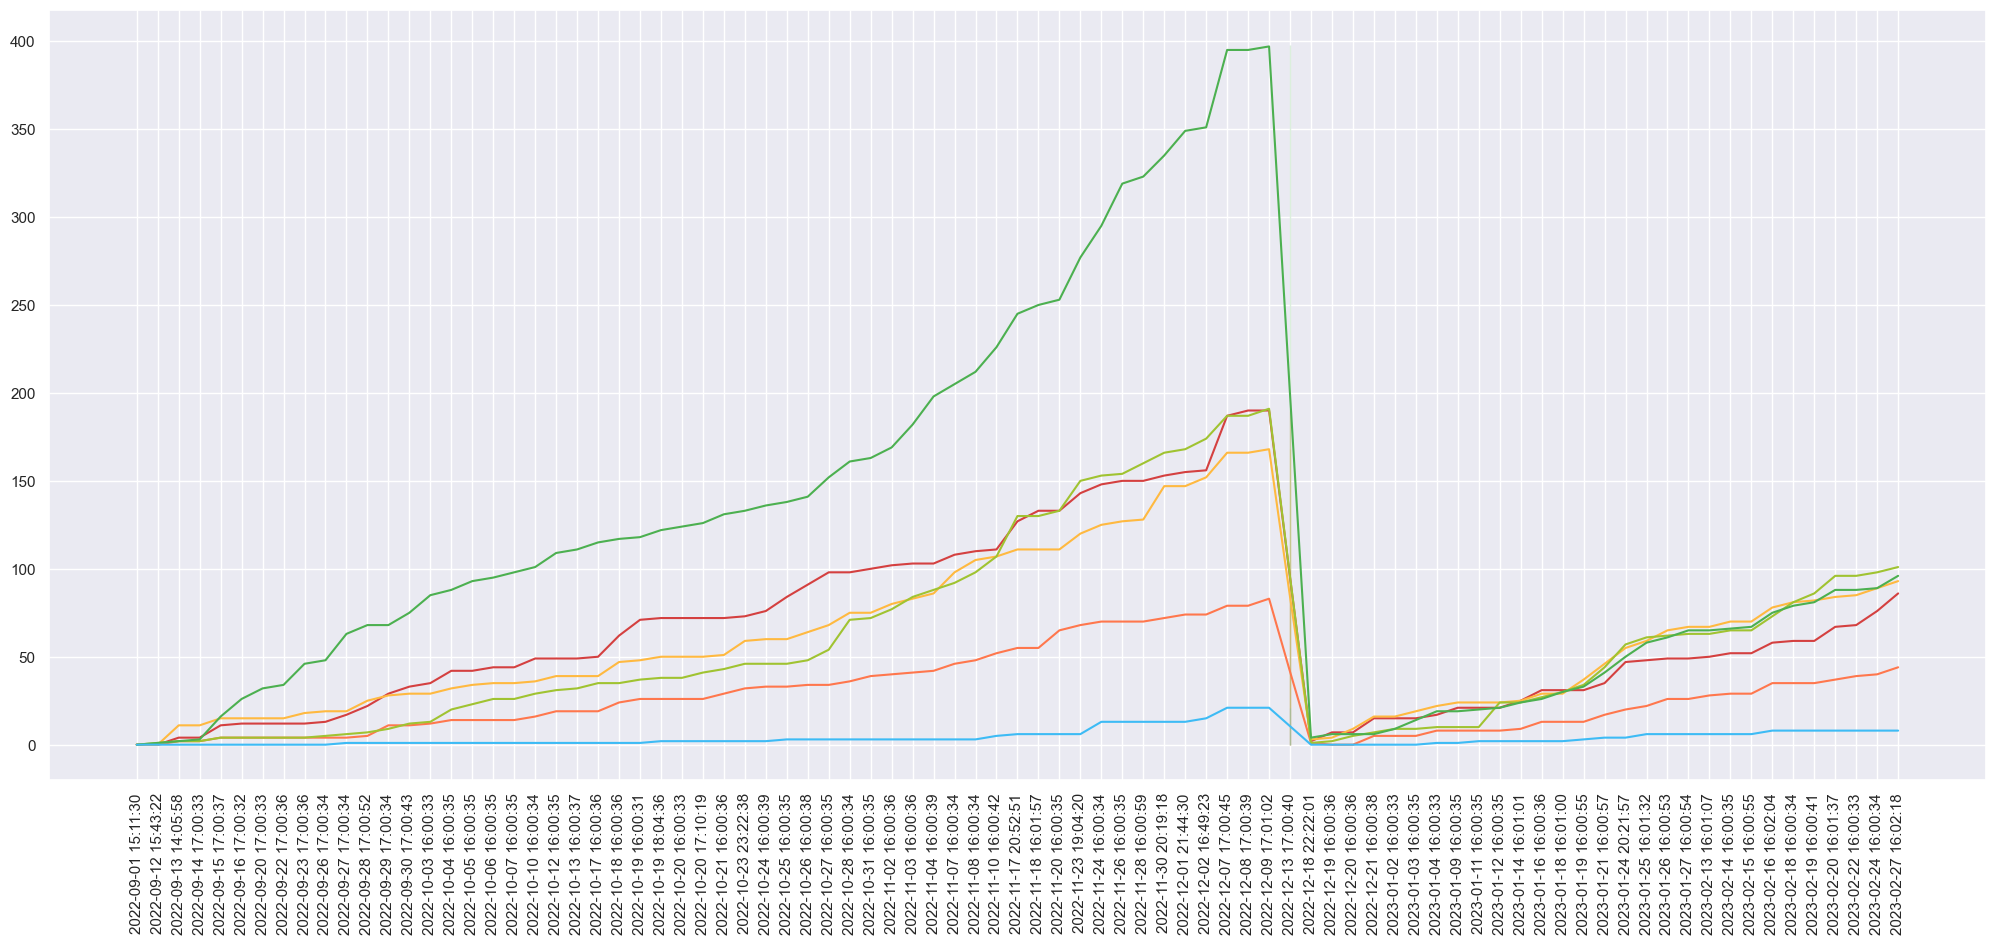

In [92]:

y_a_axis = [] 
y_b_axis = [] 
y_c_axis = [] 
y_d_axis = [] 
y_e_axis = [] 
y_f_axis = [] 

x_axis = [] # time

for day in days:

    subject = Subject("", 0, 0, 0, 0, 0, 0, 0)

    for s in day:
        subject.a += s.a
        subject.b += s.b
        subject.c += s.c
        subject.d += s.d
        subject.e += s.e
        subject.f += s.f

    y_a_axis.append(subject.a)
    y_b_axis.append(subject.b)
    y_c_axis.append(subject.c)
    y_d_axis.append(subject.d)
    y_e_axis.append(subject.e)
    y_f_axis.append(subject.f)

    x_axis.append(day[0].time)

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(25, 10)})
sns.lineplot(x=x_axis, y=y_a_axis, linewidth=1.5, color='#d44040')
sns.lineplot(x=x_axis, y=y_b_axis, linewidth=1.5, color='#ff774d')
sns.lineplot(x=x_axis, y=y_c_axis, linewidth=1.5, color='#ffb940')
sns.lineplot(x=x_axis, y=y_d_axis, linewidth=1.5, color='#a0c331')
sns.lineplot(x=x_axis, y=y_e_axis, linewidth=1.5, color='#4cb050')
sns.lineplot(x=x_axis, y=y_f_axis, linewidth=1.5, color='#3dbbf5')
plt.xticks(rotation=90)
plt.show()

In [100]:
# export changes to csv

import csv

with open('grades.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['time', 'a', 'b', 'c', 'd', 'e', 'f'])

    for day in days:
        
        subject = Subject("", 0, 0, 0, 0, 0, 0, 0)

        for s in day:
            subject.a += s.a
            subject.b += s.b
            subject.c += s.c
            subject.d += s.d
            subject.e += s.e
            subject.f += s.f

        writer.writerow([day[0].time, subject.a, subject.b, subject.c, subject.d, subject.e, subject.f])

        # for subject in day:
        #     writer.writerow([subject.time, subject.a, subject.b, subject.c, subject.d, subject.e, subject.f])
            
